In [47]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam 

from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Combinations Available

# Predict Precipitation Amount using LSTM/SimpleRNN

In [ ]:
class ModelParameters:
    def __init__(self):
        self.Special_Layer_Type = layers.SimpleRNN
        self.Special_Layer_Num = 1
        self.Special_Layer_Units = 4
        self.Special_Layer_Activation = "tanh"
        self.Dense_Layer_Num = 1
        self.Dense_Layer_Units = 4
        self.Dense_Layer_Activation = None 
        self.Output_Layer_Units = 1 
        self.Output_Layer_Activation = "linear"
        self.Epochs = 10
        self.Window_Length = 5

In [59]:

# Get Data
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)

# Turn Data into Window of X Length
raw_Inputs = df["precip"].copy()
window_length = 28
t_arr = raw_Inputs.to_numpy()
X = []
y= []

for i in range(len(t_arr)-window_length):
    t_row = []
    for j in t_arr[i:i+window_length]:
        t_row.append([j])
    X.append(t_row)
    y.append(t_arr[i + window_length])

X = np.array(X)
y = np.array(y)

in_scaler = StandardScaler()
out_scaler = StandardScaler()

X_1 = X.copy()
Y_1 = y.copy()

X = X.reshape(X.shape[0], X.shape[1])
X = in_scaler.fit_transform(X)
X = X.reshape(1280, 28, 1)

y = y.reshape(-1, 1)

y = out_scaler.fit_transform(y)
y = y.flatten()
train_part = 800
valid_part = 1000

X_train, y_train = X[:train_part], y[:train_part]
X_val, y_val = X[train_part:valid_part], y[train_part:valid_part]
X_test, y_test = X[valid_part:], y[valid_part:]
y_test_copy = y_test.copy()

In [51]:


model = Sequential([
    layers.InputLayer((window_length, 1)),
    layers.SimpleRNN(128, return_sequences=True),
    layers.SimpleRNN(128),
    layers.Dense(64),
    layers.Dense(1)
])

cp = ModelCheckpoint("LSTMTestModel/", save_best_only=True)
model.compile(
    loss = MeanSquaredError(),
    optimizer = Adam(learning_rate=0.0001),
    metrics = [RootMeanSquaredError()]
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs = 100,
    callbacks = [cp],
    verbose = 1
)

model = load_model("LSTMTestModel/")



Epoch 1/100
23/25 [==========================>...] - ETA: 0s - loss: 1.0679 - root_mean_squared_error: 1.0334INFO:tensorflow:Assets written to: LSTMTestModel/assets


INFO:tensorflow:Assets written to: LSTMTestModel/assets


25/25 [==============================] - 3s 89ms/step - loss: 1.1082 - root_mean_squared_error: 1.0527 - val_loss: 1.2034 - val_root_mean_squared_error: 1.0970
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.8460 - root_mean_squared_error: 0.9198 - val_loss: 1.2302 - val_root_mean_squared_error: 1.1092
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.8139 - root_mean_squared_error: 0.9022 - val_loss: 1.2410 - val_root_mean_squared_error: 1.1140
Epoch 4/100
25/25 [==============================] - 0s 14ms/step - loss: 0.7950 - root_mean_squared_error: 0.8916 - val_loss: 1.2852 - val_root_mean_squared_error: 1.1337
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.7585 - root_mean_squared_error: 0.8709 - val_loss: 1.2880 - val_root_mean_squared_error: 1.1349
Epoch 6/100
25/25 [==============================] - 0s 11ms/step - loss: 0.7383 - root_mean_squared_error: 0.8593 - val_loss: 1.2566 - val_root_mean_sq

9/9 [==============================] - 0s 3ms/step


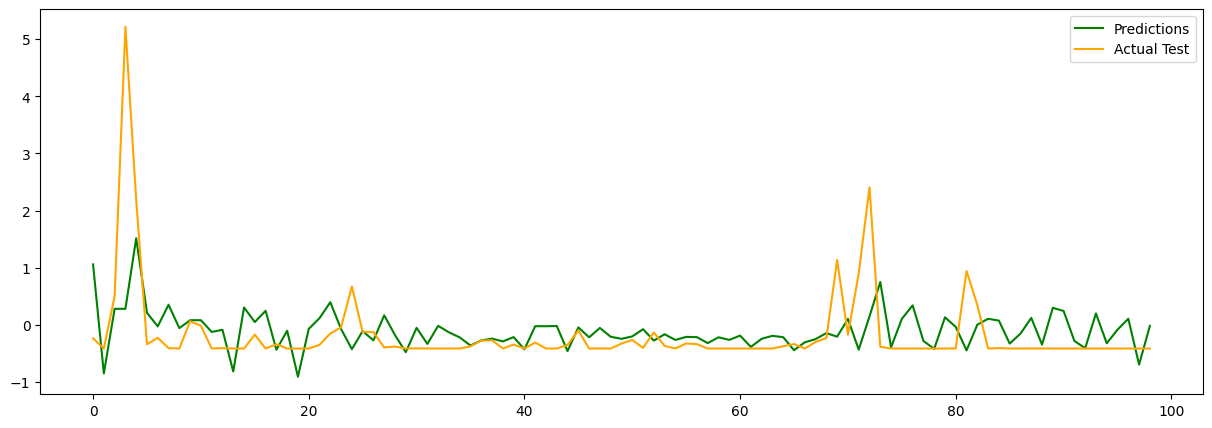

In [61]:
#test_predictions = model.predict(X_test).flatten()
#input_arr = in_scaler.transform(X_test.reshape(X_test.shape[0], X_test.shape[1]))
y_test = y_test_copy.copy()
input_arr = X_test.reshape(X_test.shape[0], X_test.shape[1])
test_predictions = model.predict(input_arr).flatten()
u = 1
l = 100
plt.figure(figsize=(15, 5))
#plt.subplot(121)
plt.plot(test_predictions[u:l], label="Predictions", color="green")
plt.legend()
#plt.subplot(122)
plt.plot(y_test[u:l], label="Actual Test", color="orange")
plt.legend()
plt.show()

9/9 [==============================] - 0s 3ms/step


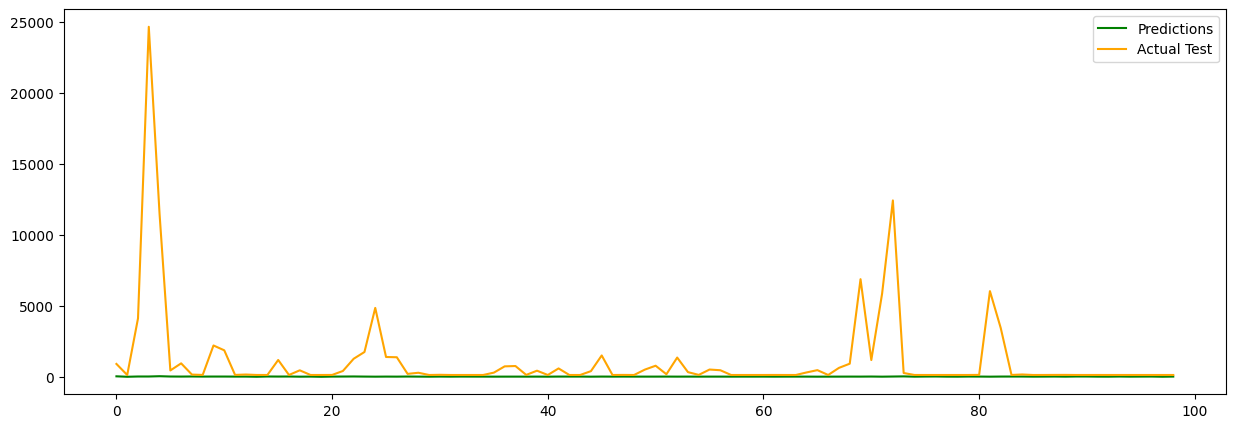

In [58]:
#test_predictions = model.predict(X_test).flatten()
#input_arr = in_scaler.transform(X_test.reshape(X_test.shape[0], X_test.shape[1]))
input_arr = X_test.reshape(X_test.shape[0], X_test.shape[1])
test_predictions = model.predict(input_arr).flatten()
y_test = y_test.reshape(-1, 1)
y_test = out_scaler.inverse_transform(y_test)
test_predictions = test_predictions.reshape(-1, 1)
test_predictions = out_scaler.inverse_transform(test_predictions)
u = 1
l = 100
plt.figure(figsize=(15, 5))
#plt.subplot(121)
plt.plot(test_predictions[u:l], label="Predictions", color="green")
plt.legend()
#plt.subplot(122)
plt.plot(y_test[u:l], label="Actual Test", color="orange")
plt.legend()
plt.show()